In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json

In [2]:
idlFile_path = "trainDATA/training/label.idl"
trainDATA_path = "trainDATA/training/"

In [3]:
with open(idlFile_path) as f:
    lines = f.readlines()
print(lines[:2])

['{"60091.jpg": [[214.1664, 192.99996, 261.00032, 224.83332000000001, 1], [74.83328, 160.49988, 224.0, 267.4998, 1]]}\n', '{"60092.jpg": [[15.166656, 197.49996, 80.16640000000001, 233.49996000000002, 1], [52.250048, 215.49996, 85.49951999999999, 254.5002, 3]]}\n']


In [4]:
save_path = "trainDATA/training/label.npy"
def idltonumpy(idlfile,savepath):
    label_np = {}
    with open(idlFile_path) as f:
        for line in f:
            jsonload = json.loads(line) # type(line): str  type(jsonload):dir
            assert len(jsonload.keys()) ==1, "only one image per json file"
            label_np[list(jsonload.keys())[0]] = jsonload[list(jsonload.keys())[0]]
    np.save(save_path,label_np) 
    return label_np

label_np = idltonumpy(idlFile_path,save_path)

In [5]:
len(label_np.keys())

10000

In [6]:
allbox = [obj for key in label_np.keys() for obj in label_np[key]]
len(allbox)

53901

In [7]:
carbox = [obj for key in label_np.keys() for obj in label_np[key] if obj[-1]==1]
peoplebox = [obj for key in label_np.keys() for obj in label_np[key] if obj[-1]==2]
motorcyclesbox = [obj for key in label_np.keys() for obj in label_np[key] if obj[-1]==3]
trafficlightbox = [obj for key in label_np.keys() for obj in label_np[key] if obj[-1]==20]
nobox = [key for key in label_np.keys() if label_np[key]==[]]

In [8]:
print(len(carbox),len(peoplebox),len(motorcyclesbox),len(trafficlightbox))
print(len(nobox))

45357 4149 2889 1506
593


In [9]:
list(label_np.keys())[:2]

['60091.jpg', '60092.jpg']

60091.jpg


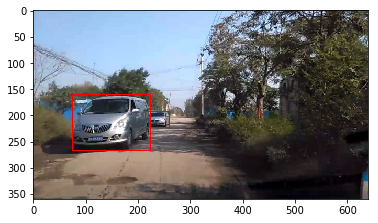

60092.jpg


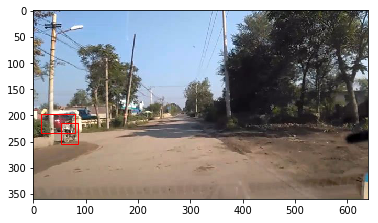

60093.jpg


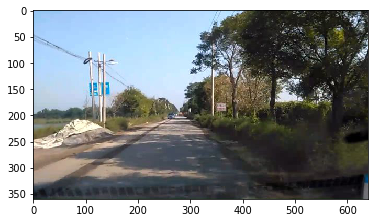

60094.jpg


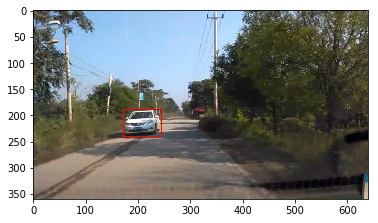

60095.jpg


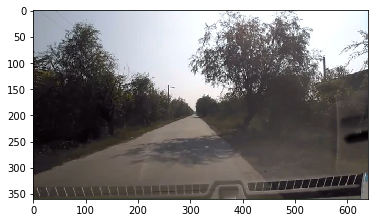

60096.jpg


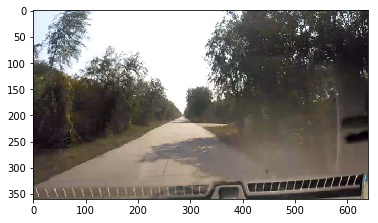

60097.jpg


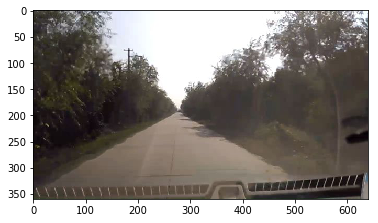

60098.jpg


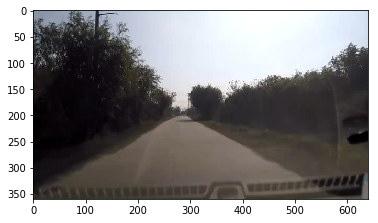

60099.jpg


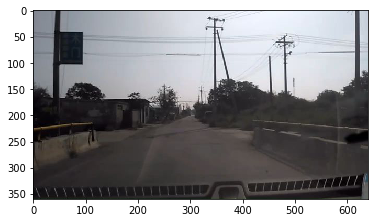

60100.jpg


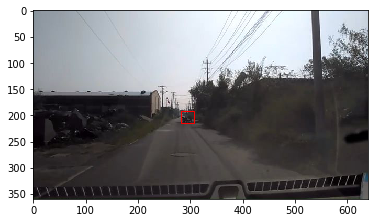

In [10]:
for key in list(label_np.keys())[:10]:
    im = plt.imread(trainDATA_path+key)
    # create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)
    
    for box in label_np[key]:
        x1,y1,x2,y2,_ = box
        x = int(x1)
        y = int(y1)
        w = int(x2-x1)
        h = int(y2-y1)        
        # create a rectangle patch
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
        
        # add the parch to the axes
        ax.add_patch(rect)
    print(key)    
    plt.show()
    

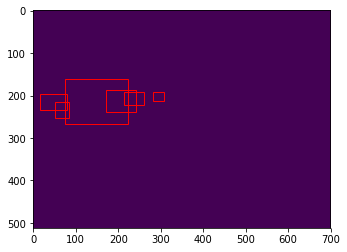

In [11]:
# create figure and axes
fig,ax = plt.subplots(1)
im = np.ones(shape = (512,700))
ax.imshow(im)
for key in list(label_np.keys())[0:10]:
    for box in label_np[key]:
        x1, y1, x2, y2, _ = box
        x = int(x1)
        y = int(y1)
        w = int(x2-x1)
        h = int(y2-y1)
        # Create a Rectangle patch
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        
plt.show()